<h1 align='center'> <b> DIABETES PREDICTION SYSTEM - DỰ ĐOÁN BỆNH TIỂU ĐƯỜNG DỰA TRÊN CÁC PHÉP ĐO CHẨN ĐOÁN VÀ BỘ DỮ LIỆU TỪ KAGGLE  </b> </h1>

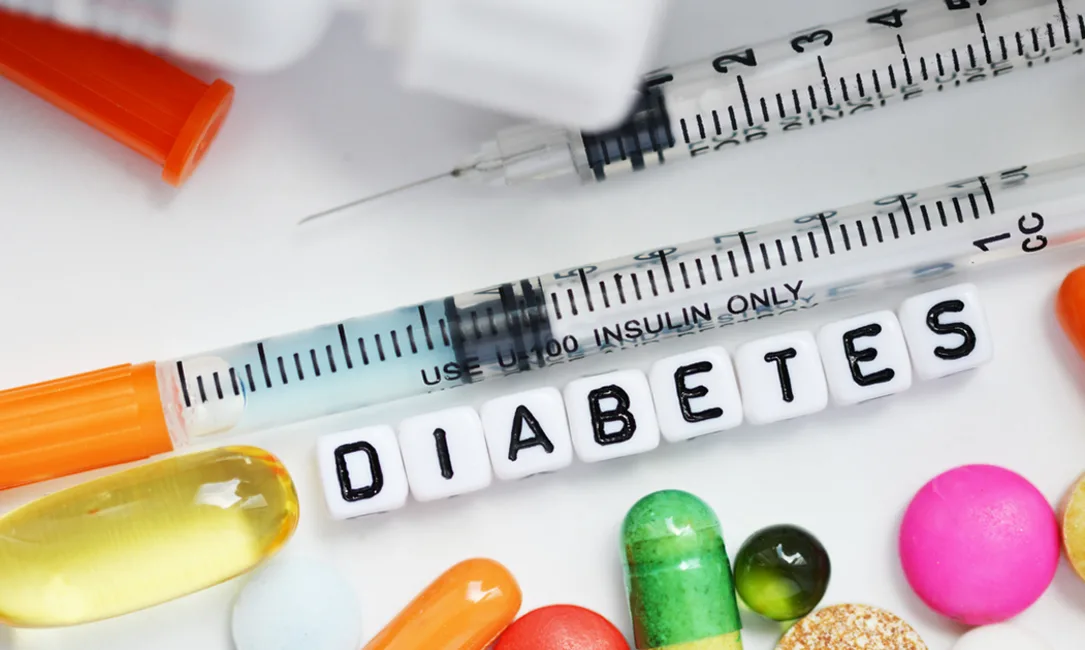

**Thành viên thực hiện**

* *20280002 - Nguyễn Đình Ân*
* *20280007 - Võ Thái Bình*
* *20280050 - Huỳnh Bảo Khang*
* *20280058 - Đặng Yến Linh*


**Nội dung** 
1. Loading dataset - Đọc bộ dữ liệu
2. Exploratory Data Analysis - Phân tích dữ liệu tổng quan
3. Data Visualization - Trực quan hóa dữ liệu
4. Data Pre-processing - Tiền xử lý dữ liệu
5. Model building - Xây dựng mô hình
6. Review - Đánh giá mô hình


#**1. LOAD THE DATASET - - Đọc bộ dữ liệu**

In [77]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# path to the working directory 
%cd "/content/drive/MyDrive/data"

/content/drive/MyDrive/data


Importing Libraries : Thêm những thư viện cần thiết 

In [79]:
#Calculation and analysis libraries
import numpy as np 
import pandas as pd

# Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

#Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Training Models
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Evaluting model
from sklearn import metrics
from sklearn.metrics import mean_squared_error



-	Numpy : Thư viện toán học hỗ trợ xử lí các dãy số, ma trận nhiều chiều,…
-	Pandas : Thư viện phục vụ các thao tác xử lý, phân tích dữ liệu,…
-	Sklearn : Thư viện hỗ trợ các thuật toán máy học.
-	Matplotlib, seaborn : Thư viễn hỗ trợ trực quan hóa dữ liệu.
-	Ipython : Notebook để tương tác trực quan với python.

*Khi làm việc với pandas, matplotlib có thể không hoạt động tốt khi xử lí dataframe nên ta cần thêm thư viện seaborn.

In [80]:
 #Reading dataset
dataset = pd.read_csv('diabetes.csv')

Nguồn bộ dữ liệu : Kaggel 
https://www.kaggle.com/datasets/mathchi/diabetes-data-set


#**2. EXPLORATORY DATA ANALYSIS  - Phân tích tổng quát dữ liệu**

Bộ dữ liệu này ban đầu được lấy từ Viện Quốc gia về Bệnh tiểu đường và các bệnh về tiêu hóa và thận. Mục tiêu là để dự đoán dựa trên các phép đo chẩn đoán xem một bệnh nhân có bị tiểu đường hay không. Đặc biệt, tất cả bệnh nhân ở đây đều là nữ từ 21 tuổi trở lên ở Ấn Độ.


Bộ dữ liệu có 9 cột tương ứng 9 thông tin (biến) như sau : 
-	Pregnancies: Số lần mang thai.
-	Glucose: Nồng độ glucose trong huyết tương sau 2 giờ trong xét nghiệm dung nạp glucose qua đường uống.
-	BloodPressure: Huyết áp (áp lực máu) tâm trương (mm Hg)
-	SkinThickness: Độ dày nếp gấp da cơ tam đầu (mm)
-	Insulin: Insulin huyết thanh trong 2 giờ (mu U / ml)
-	BMI: Chỉ số khối cơ thể (cân nặng tính bằng kg / (chiều cao tính bằng m) ^ 2)
-	DiabetesPedigreeFunction: Chức năng phả hệ của bệnh tiểu đường
-	Age: Tuổi 
-	Outcome: Kết quả (0: không mắc bệnh hoặc 1: có mắc bệnh)


In [81]:
# showing first 5-line of dataset 
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
# number of rows and columns of the dataset 
dataset.shape

(768, 9)

Dữ liệu có 768 dòng và 9 cột

In [83]:
# datatypes of dataset 
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [84]:
# Calculates statistical values obtained from variables of dataset 
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
# showing general infor of dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Bộ dữ liệu không có giá trị bị thiếu. Tuy nhiên, theo quan sát từ dữ liệu 5 dòng đầu tiên có thể thấy rằng vẫn tồn tại các giá trị bằng 0 (tương đương không có dữ liệu). Vì vậy mà ta vẫn phải tiến hành bước tiền xử lý dữ liệu để thay thế các giá trị bằng 0 này.

In [86]:
# statistics values in column “outcome” 
dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

-	Cột kết quả có 500 giá trị 0 (không mắc bệnh) và 268 giá trị 1 (có mắc bệnh).
-	Có thể thấy rằng bộ dữ liệu không cân bằng. Vì vậy để tránh sai lệch cho kết quả của mô hình, ta nên tiến hành xử lý mất cân bằng dữ liệu. (được trình bày ở phần 4)


In [87]:
# mean of each variable according to 2 values (0 & 1) of “outcome” 
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Giá trị trung bình của từng biến trong bộ dữ liệu theo 2 giá trị 0 & 1 của biến **"Outcome"**

#**3.	DATA VISUALIZATION - Trực quan hóa dữ liệu**

##**3.1 Đồ thị boxplot minh họa vị trí phân bố của dữ liệu từng biến trong bộ dữ liệu**

In [88]:
#delete “outcome” column from dataset 
dataset_drop_outcome = dataset.drop(columns='Outcome', axis=1)

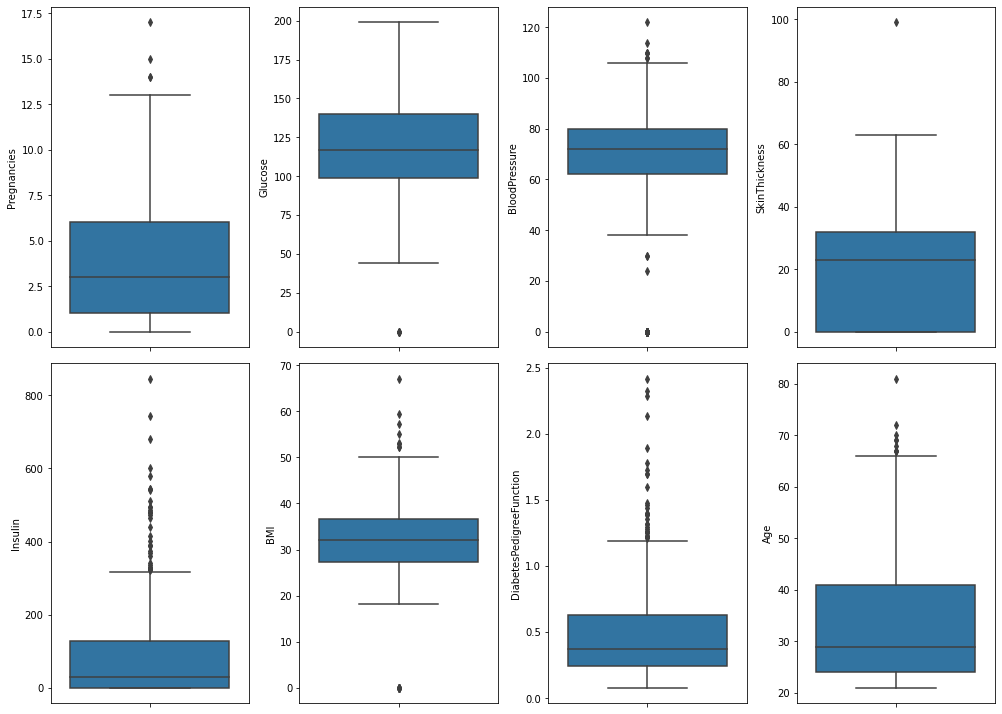

In [89]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(14, 10))
index = 0
axs = axs.flatten()
for k,v in dataset_drop_outcome.items():
    sns.boxplot(y=k, data=dataset_drop_outcome, ax=axs[index])
    index += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)


-	Biểu đồ boxplot thể hiện khoảng tứ phân vị khác nhau của 8 biến : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction và Age. Riêng biến "Outcome" (kết quả) đã được tách ra khỏi bộ dữ liệu.
-	Các biến ‘Glucose”, “SkinThickness”, “Pregnancies” có ít điểm ngoại lai hơn so với các biến còn lại.
-	“BloodPressure” và “Insulin” là hai biến có nhiều điểm ngoại lai nhất.


In [90]:
# Calculate the percentage of the outlier points of each variable 

for k, v in dataset_drop_outcome.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(dataset)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Pregnancies outliers = 0.52%
Column Glucose outliers = 0.65%
Column BloodPressure outliers = 5.86%
Column SkinThickness outliers = 0.13%
Column Insulin outliers = 4.43%
Column BMI outliers = 2.47%
Column DiabetesPedigreeFunction outliers = 3.78%
Column Age outliers = 1.17%



- Biến “BloodPressure” nhiều nhất với  5,86% điểm ngoại lai.
- Biến “SkinThickness” ít nhất với 0,13% điểm ngoại lai.
- Các giá trị ngoại lai này có thể ảnh hưởng đến độ chính xác của mô hình, vì vậy mà xác định và xử lý outliers là một bước cực kì quan trọng trong quá trình xử lý dữ liệu. Việc xử lý các dữ liệu ngoại lai sẽ giúp tăng cao độ chính xác cho các mô hình dự đoán. Tuy nhiên xử lý chúng như thế nào thì còn tùy thuộc vào từng hoàn cảnh. Cần tìm hiểu sâu hơn nguyên nhân gây ra các outliers trước khi quyết định loại bỏ hay giữ lại những outliers này. 

##**3.2 Biểu đồ cột và đường cong ước lượng minh họa nhanh phân phối chuẩn của từng biến trong bộ dữ liệu**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

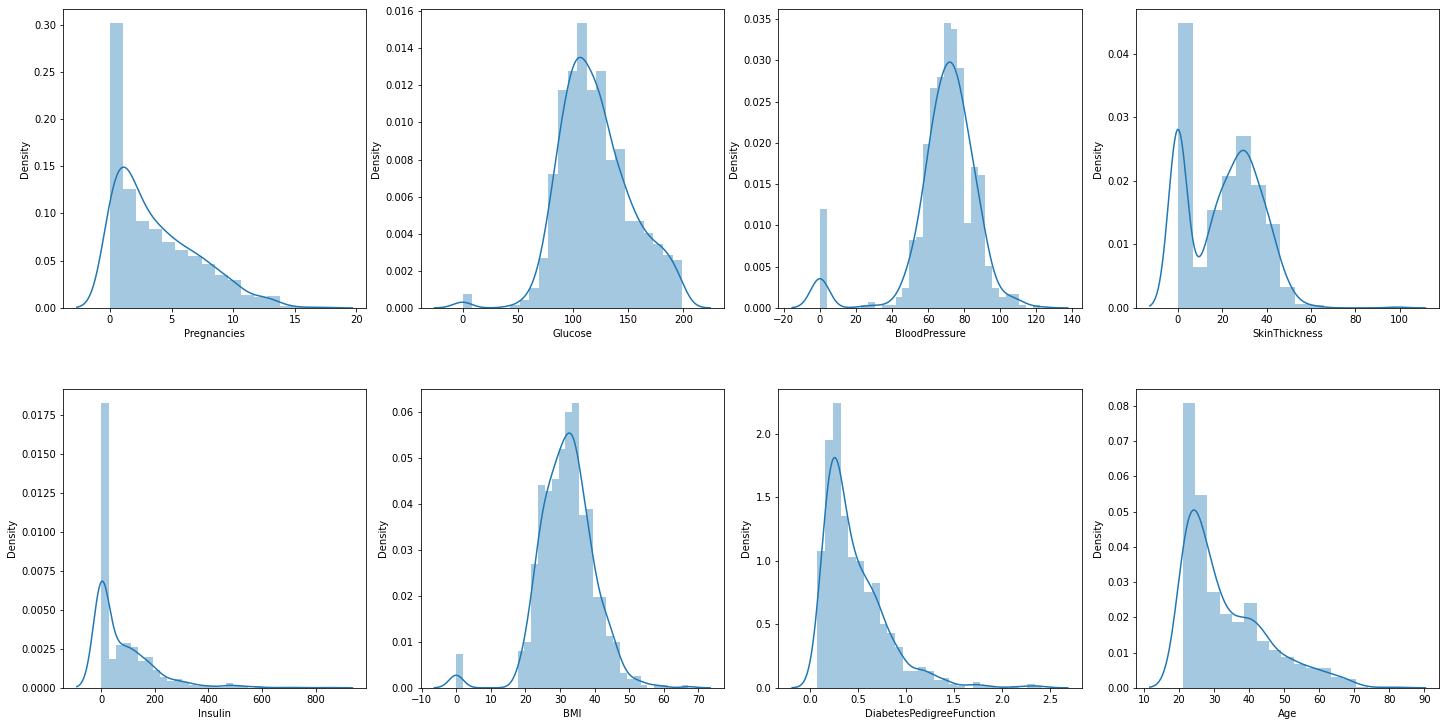

In [91]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset_drop_outcome.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


-	Đường cong ước lượng của mỗi biến có sự khác nhau, thể hiện cho phân phối của biến đó.
-	Các biến đều có sự phân bố dữ liệu không đồng đều.


#**4.	DATA PRE-PROCESSING - Tiền xử lý dữ liệu**

##**4.1 Handling missing value - Xử lý giá trị bị mất**

 **Vì sao cần xử lí dữ liệu bị thiếu?**

Với dữ liệu bảng, việc các trường thông tin bị thiếu là thường xuyên xảy ra. Việc này đến từ quá trình thu thập dữ liệu. Các giá trị bị thiếu này có thể ảnh hưởng đến độ chính xác của mô hình nên ta cần xử lý nó. Trong trường hợp này, bộ dữ liệu không có giá trị null mà mang giá trị 0 (được xem như một giá trị bị thiếu) và nhóm chúng em chọn thay thế các giá trị này của từng biến bằng giá trị trung bình của biến đó.


In [92]:
# number of rows missing value of each variable 
print("total number of rows : {0}".format(len(dataset)))
print("number of rows missing Pregnancies: {0}".format(len(dataset.loc[dataset['Pregnancies'] == 0])))
print("number of rows missing Glucose: {0}".format(len(dataset.loc[dataset['Glucose'] == 0])))
print("number of rows missing BloodPressure : {0}".format(len(dataset.loc[dataset['BloodPressure'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(dataset.loc[dataset['SkinThickness'] == 0])))
print("number of rows missing Insulin: {0}".format(len(dataset.loc[dataset['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(dataset.loc[dataset['BMI'] == 0])))
print("number of rows missing  DiabetesPedigreeFunction: {0}".format(len(dataset.loc[dataset['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(dataset.loc[dataset['Age'] == 0])))

total number of rows : 768
number of rows missing Pregnancies: 111
number of rows missing Glucose: 5
number of rows missing BloodPressure : 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing  DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [93]:
imputer = SimpleImputer(missing_values=0, strategy="mean")

In [94]:
# replace the missing value of each variable with its mean 
dataset.Glucose = imputer.fit_transform(dataset['Glucose'].values.reshape(-1,1))[:,0]
dataset.BloodPressure = imputer.fit_transform(dataset['BloodPressure'].values.reshape(-1,1))[:,0]
dataset.SkinThickness = imputer.fit_transform(dataset['SkinThickness'].values.reshape(-1,1))[:,0]
dataset.BMI = imputer.fit_transform(dataset['BMI'].values.reshape(-1,1))[:,0]
dataset.Insulin = imputer.fit_transform(dataset['Insulin'].values.reshape(-1,1))[:,0]

-	Hai biến “DiabetesPedigreeFunction” và “Age” không có missing value nên không cần thay thế.
-	Đặc biệt, biến “Pregnancies” có 111 giá trị thiếu. Tuy nhiên, biến này là số lần mang thai của một người, nên theo điều kiện kiểm tra giá trị missing value (giá trị bằng 0) thì ta không cần phải thay thế các giá trị bằng 0 của biến này.


##**4.2 Handling Imbalance - Xử lý mất cân bằng dữ liệu**

Mất cân bằng dữ liệu trong khi xây dựng mô hình Machine Learning (Classification) là việc rất hay xảy ra dẫn đến việc mô hình chạy ra kết quả sai lệch hoặc không đúng so với thực tế. Resampling dữ liệu là một trong những cách tiếp cận được sử dụng nhiều nhất để xử lý bộ dữ liệu không cân bằng. Và trong trường hợp này, nhóm chung em sử dụng phương pháp upsampling (tức là lấy mẫu lên)



In [95]:
# upsampling method 

df_majority = dataset[dataset['Outcome']==0]
df_minority = dataset[dataset['Outcome']==1]
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=500)
dataset = pd.concat([df_majority, df_minority_upsampled])
dataset['Outcome'].value_counts()

0    500
1    500
Name: Outcome, dtype: int64

Dữ liệu sau khi được cân bằng 

In [96]:
X = dataset.drop(columns='Outcome', axis=1)
y = dataset['Outcome']

In [97]:
#Data standardization
sc = StandardScaler()
sc.fit(X)
standardized_data = sc.transform(X)
print(standardized_data)

[[-0.89636283 -1.31347613 -0.56441494 ... -0.93269185 -0.42248793
  -0.26247341]
 [-0.89636283 -1.18414008 -0.56441494 ... -0.71780725 -0.96414667
  -1.1143832 ]
 [ 0.26472892 -0.31112176  0.07730902 ... -1.07594825 -0.86405755
  -0.34766439]
 ...
 [ 0.26472892  1.30557884 -0.08312197 ... -1.04729697  0.27224828
   1.44134618]
 [-1.18663577  0.46489452 -0.64463044 ...  1.35941054 -0.18698413
  -0.85881026]
 [-0.31581696  1.98459309 -0.24355296 ...  0.47122086 -0.25469147
   0.16348149]]


Bởi vì bộ dữ liệu có nhiều biến khác nhau, mỗi biến có thông số và đơn vị đo khác nhau nên ta cần chuẩn hóa tất cả dữ liệu về cùng một thước đo.

#**5.	MODEL BUILDING - Xây dựng mô hình**

##**5.1 Chia dữ liệu thành train và test**

Dùng để đánh giá ước lượng hiệu quả của mô hình một cách nhanh chóng. 
- Tập huấn luyện (training set) là tập dữ liệu được sử dụng để huấn luyện mô hình.
- Mục tiêu của machine learning là tạo ra những mô hình có khả năng tổng quát hóa để dự đoán tốt trên cả dữ liệu chưa thấy bao giờ (nằm ngoài tập huấn luyện), do đó, để biết một thuật toán hay mô hình có tốt hay không thì sau khi được huấn luyện, mô hình cần được đánh giá hiệu quả thông qua bộ dữ liệu kiểm thử (testing set)


In [98]:
#Split the dataset.
X = standardized_data
y = dataset['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [99]:
# number of rows and columns of the X_train and X_test
X_train.shape, X_test.shape

((800, 8), (200, 8))

Bộ dữ liệu được chia thành hai tập : một tập để huấn luyện và một tập để kiểm thử lần lượt theo tỷ lệ 8 : 2 

##**5.2 So sánh (comparison models) và chọn thuật toán cho mô hình( choose models)**

a) So sánh :

*Thuật toán đánh giá hiệu suất của mô hình(cross_validation): 
- Giải thích : Cross-validation là một phương pháp kiểm tra độ chính xác của 1 máy học dựa trên một tập dư liệu học cho trước. Thay vì chỉ dùng một phần dữ liệu làm tập dữ liệu học thì cross-validation dùng toàn bộ dữ liệu để dạy cho máy. 

- Ứng dụng: tính ra accuracy trung bình của từng thuật toán, từ đó ta có thể chọn ra thuật toán tốt nhất với bài toán.bằng cách chọn thuật toán có trung bình lớn nhất( cụ thể trong bài là với 6 loại mô hình lần lược như sau: 'LR', 'LDA', 'KNN', 'CART',. 'NB', 'SVM', ta sẽ chọn CART( desicion tree)) 

- Thuật toán cụ thể : Các bước chính

*Kỹ thuật này thường bao gồm các bước như sau:


1. 	Xáo trộn dataset một cách ngẫu nhiên
2.  Chia dataset thành k nhóm
3.  Với mỗi nhóm:
*   Sử dụng nhóm hiện tại để đánh giá
*   Các nhóm còn lại được sử dụng để huấn luyện mô hình
* Huấn luyện mô hình
* Đánh giá và sau đó hủy mô hình
4.	Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá
*Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá. Ví dụ với k=10, phương pháp sẽ mang tên 10-fold cross-validation.

Ba chiến thuật phổ biến để lựa chọn k:

-	Đại diện: Giá trị của k được chọn để mỗi tập train/test đủ lớn, có thể đại diện về mặt thống kê cho dataset chứa nó.
-	k=10: Giá trị của k được gán cố định bằng 10, một giá trị thường được sử dụng và được chứng minh là cho sai số nhỏ, phương sai thấp (thông qua thực nghiệm).
-	k=n: Giá trị của k được gán cố định bằng n , với n là kích thước của dataset, như vậy mỗi mãu sẽ được sử dụng để đánh giá mô hình một lần. Cách tiếp cận này còn có tên leave-one-out cross-validation








In [100]:
num_folds = 10 #splits the whole data into 10 folds and uses 10-1 fold for training and 1 fold for testing.
seed = 50 #generate the random number generator
scoring = 'accuracy' #designate a scorer object with the scoring parameter

In [101]:
#  Loading all Models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Một số các mô hình để so sánh :


*   Hồi quy tuyến tính
*   Phân tích phân biệt tuyến tính
*   KNeighbors
*   Cây quyết định
*   Guass
*   SVC



Phần này ta sẽ so sánh từng loại mô hình bằng thuật toán cross_validation, từ đó có cái nhìn trực quan hơn về việc choose models.

In [102]:
#Evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.760000 (0.037417)
LDA: 0.755000 (0.040774)
KNN: 0.743750 (0.026955)
CART: 0.807500 (0.030721)
NB: 0.720000 (0.030721)
SVM: 0.777500 (0.045346)


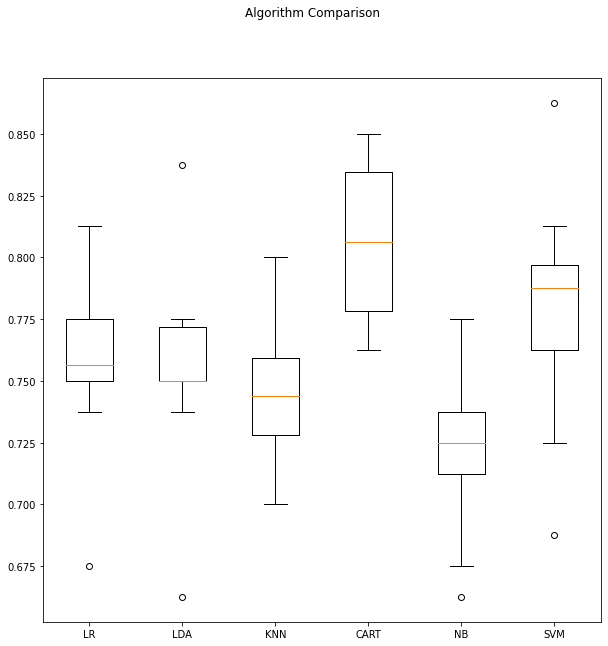

In [103]:
#Ploted Box Plot to clearly visualize the result.
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

b) Lựa chọn mô hình : 

Từ hình ảnh minh họa so sánh giá trị trung bình độ chính xác của từng thuật toán ta nhận thấy "DecisionTreeClassifier" dẫn đầu với giá trị trung bình bằng 0.8325 và độ lệch chuẩn 0.033166. Vì vậy nhóm chúng em quyết định sử dụng mô hình cây quyết định.

Đầu tiên ta sử dụng Decision Tree với các tham số mặc định mà thư viện sk-learn hỗ trợ. Với các tham số mặc định .

In [116]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


Mô hình cây quyết định với độ chính xác 0.895


In [118]:
feature_cols = ['Pregnancies', 'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

Minh họa cách hoạt động của mô hình cây quyết định 

##**5.3 Tối ưu hóa mô hình(optimization models)**

Với các model bạn đang sử dụng, điều không thể thiếu là các parameter, và tất nhiên là tuỳ thuộc mỗi bài toán cụ thể, số dữ liệu training đang có, sẽ có các parameter thích hợp. Và việc thử nhiều parameter khác nhau là điều đương nhiên cần thiết.
Có 2 phương pháp chính là Grid Search và Random Search . 2 cách có các ưu và nhược điểm khác nhau:
-	Grid Search sẽ thử hết tất cả các trường hợp có thể của parameters ta đưa ra tuy nhiên sẽ tốn nhiều thời gian. 
-	Random Search sẽ thử ngẫu nhiên một số trường hợp có thể có của parameters ta đưa vào , tốc độ sẽ nhanh hơn nhưng bù lại có thể bỏ sót các parameters phù hợp hơn.
-	So sánh thời gian của Grid search và random Search: Với dữ liệu lớn khoảng >10 phút, trong khi đó random search tốn tầm 2->3 phút .
Ở đây ta sẽ sử dụng kĩ thuật thứ nhất để k bỏ sót bất kì parameters nào.

Giải thích cách hoạt động của Grid search: Những gì phù hợp làm là tham gia nhiều hơn một chút so với bình thường. Đầu tiên, nó chạy cùng một vòng lặp với xác nhận chéo, để tìm ra kết hợp tham số tốt nhất. Sau khi có sự kết hợp tốt nhất, nó sẽ chạy khớp trở lại trên tất cả dữ liệu được truyền cho vừa khớp (không xác nhận chéo), để tạo một mô hình mới duy nhất bằng cách sử dụng cài đặt thông số tốt nhất.

In [119]:
pipe = Pipeline(steps=[('sc', sc),
                        ('dec_tree', clf)])
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2, 4, 6, 8, 10, 12, 13, 14, 15, 16, 17, 18]
splitter = ['best', 'random']
min_samples_split = [1, 2, 3, 4]
parameters = dict(dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth,
                  dec_tree__splitter=splitter)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best splitter:', clf_GS.best_estimator_.get_params()['dec_tree__splitter'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 14
Best splitter: best

DecisionTreeClassifier(max_depth=14)


Sau khi tìm được best criterion và best max_depth, ta vẽ lại cây với tham số mới, từ đó làm tăng độ chính xác lên.

In [120]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=14)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.865


Sau khi tối ưu mô hình cây quyết định, độ chính xác của mô hình đã tăng lên

In [121]:
feature_cols = ['Pregnancies', 'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

#**6. REVIEW - Đánh giá mô hình**

##**6.1 Classification report**

* **Precision**: tỉ lệ số điểm **true positive (TP)** trong số **những điểm được phân loại** là **positive (TP + FP)**.
* **Recall**: tỉ lệ số điểm **true positive (TP)** trong số **những điểm thực sự** là **positive (TP + FN)**.
* F1-score: trung bình hài hòa (harmonic mean) của **precision** và recall
  * F1 = $\Large\frac{2\;*\;precision\;*\;recall}{precision\;+\;recall}$

---
* **y_test**: giá trị output của dữ liệu test
* **Negative**: 0 | **Neutral**: 1 | **Positive**: 2

##**6..2 Confution matrix**

Nó thể hiện được có bao nhiêu điểm dữ liệu thực sự thuộc vào một class, và được dự đoán là rơi vào một class.

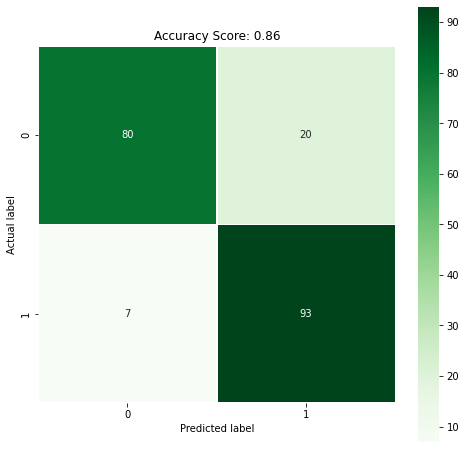

In [122]:
# plot confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred)
score = clf.score(X_test, y_test) 
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: %.2f' %score
plt.title(all_sample_title, size = 12)
plt.show()

- Trục actual label( trục kết quả )và trục predicted label ( trục dự đoán). Như vậy mỗi lần đánh giá mô hình sẽ cho ra một confution khác nhau và trên đường chéo chính của ma trận càng đậm có nghĩa là tỉ lệ dự đoán đúng càng lớn và ngược lại tỉ lệ dự đoán sai càng nhỏ ( đường chéo phụ mờ ) 

In [123]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       100
           1       0.82      0.93      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



In [125]:
2#Diabetes Predict System
#6	148	72	35	0	33.6	0.627	50 => 1
#1	85	66	29	0	26.6	0.351	31 => 0
#8	183	64	0	0	23.3	0.672	32	=> 1
#1	89	66	23	94	28.1	0.167	21 =>	0
print('\x1b[0;30;43m' + '|     WELCOME TO DIABETES PREDICT SYSTEM     |' + '\x1b[0m')
print('==============================================')
preg = int(input('             Pregnancies: '))
glu = int(input('                 Glucose: '))
blood = int(input('           BloodPressure: '))
skin = int(input('           SkinThickness: '))
ins = int(input('                 Insulin: '))
bmi = float(input('                     BMI: '))
ped = float(input('DiabetesPedigreeFunction: '))
age = int(input('                     Age: '))
input_set = np.array([preg, glu, blood, skin, ins, bmi, ped, age]).reshape(1, -1)
std_data = sc.transform(input_set)
output = clf.predict(std_data)
print('==============================================')
if output == 0:
  print("             \x1b[0;30;42m" + 'Don\'t have diabetes!' + '\x1b[0m')
else:
  print("                 \x1b[0;30;41m" + 'Have diabetes!' + '\x1b[0m')

|     WELCOME TO DIABETES PREDICT SYSTEM     |
             Pregnancies: 6
                 Glucose: 148
           BloodPressure: 72
           SkinThickness: 35
                 Insulin: 0
                     BMI: 33.6
DiabetesPedigreeFunction: 0.627
                     Age: 50
                 Have diabetes!


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
